
# Comprehensive Analysis of ChatGPT User Reviews

This notebook performs an in-depth analysis of user reviews and ratings for the ChatGPT Android App. The analysis includes sentiment analysis, temporal trends, score distribution, thumbs up analysis, and more.

## Dataset Description
The dataset consists of daily-updated user reviews and ratings for the ChatGPT Android App. The key attributes in the dataset are:
- `userName`: The display name of the user who posted the review.
- `content`: The text content of the review.
- `score`: The rating given by the user.
- `thumbsUpCount`: The number of thumbs up (likes) the review received.
- `at`: The timestamp of when the review was posted.

## Importing nessecary Libraries and Datasets

In [3]:

import pandas as pd

file_path = 'data/clean_chatgpt_reviews.csv'
reviews_df = pd.read_csv(file_path)

reviews_df.head()


,Unnamed: 0,userName,content,score,thumbsUpCount,at
0,0,T H (Trudylh20),excellent Im impressed 👌 👏,5,0,28-06-2024 21:07
1,1,Muhammad bassam adam,perfect,5,0,28-06-2024 20:56
2,2,Chinaza Okoli,its been so helpful...love it,5,0,28-06-2024 20:54
3,3,Project House Group Ltd,It's amazing tools help me a lot with my work.,5,0,28-06-2024 20:51
4,4,Safoan Riyad,I enjoyed ChatGPT. But last update ruined ever...,1,0,28-06-2024 20:50



## Sentiment Analysis


In [4]:

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def get_sentiment_scores(review):
    return analyzer.polarity_scores(review)

reviews_df['sentiment_scores'] = reviews_df['content'].apply(get_sentiment_scores)

reviews_df['compound'] = reviews_df['sentiment_scores'].apply(lambda x: x['compound'])

reviews_df['sentiment'] = reviews_df['compound'].apply(lambda x: 'positive' if x >= 0.05 else ('negative' if x <= -0.05 else 'neutral'))

reviews_df['sentiment'].value_counts()


sentiment
positive    117139
neutral      23563
negative      9017
Name: count, dtype: int64


## Temporal Trends



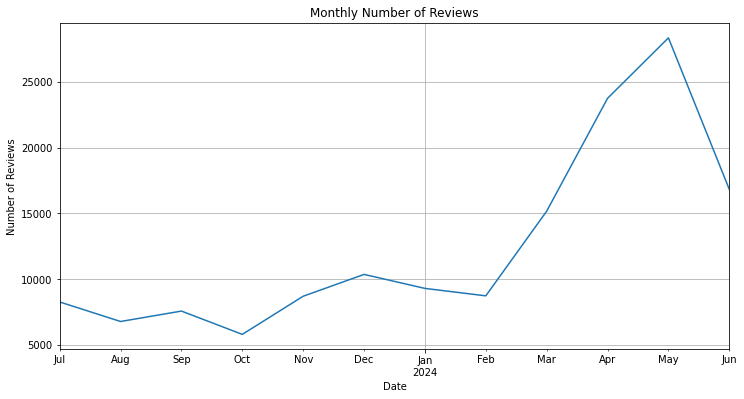

In [5]:

import matplotlib.pyplot as plt

reviews_df['at'] = pd.to_datetime(reviews_df['at'], format='%d-%m-%Y %H:%M')

reviews_df.set_index('at', inplace=True)

monthly_reviews = reviews_df.resample('M').size()

plt.figure(figsize=(12, 6))
monthly_reviews.plot()
plt.title('Monthly Number of Reviews')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.show()



## Score Distribution



/tmp/ipykernel_11776/713026803.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='score', data=reviews_df, palette='viridis')


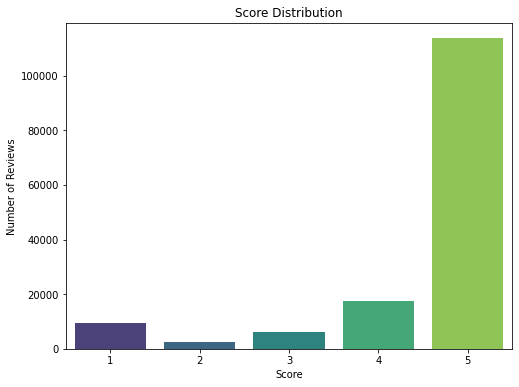

In [6]:

import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x='score', data=reviews_df, palette='viridis')
plt.title('Score Distribution')
plt.xlabel('Score')
plt.ylabel('Number of Reviews')
plt.show()



## Thumbs Up Analysis



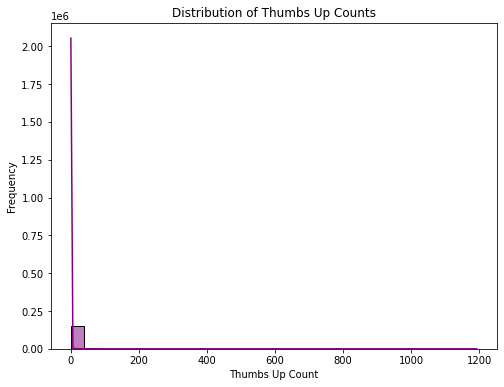

,userName,content,thumbsUpCount
at,,,
2023-12-25 17:13:00,Jonathan Lawrence,"it's really brilliant, I mean it's dumb as a b...",1193
2024-01-22 10:15:00,Haris Bilal,Certainly! Here's a review based on your feedb...,1068
2024-02-16 14:19:00,Asif,ChatGPT is an incredible app that delivers lig...,1017
2024-01-07 18:32:00,Radley Seann Cayanan,"""I am absolutely thrilled with the ChatGPT And...",971
2024-01-29 21:34:00,Dee Thompson,Still learning this app and everything in it. ...,941


In [7]:

plt.figure(figsize=(8, 6))
sns.histplot(reviews_df['thumbsUpCount'], bins=30, kde=True, color='purple')
plt.title('Distribution of Thumbs Up Counts')
plt.xlabel('Thumbs Up Count')
plt.ylabel('Frequency')
plt.show()

top_reviews = reviews_df.sort_values(by='thumbsUpCount', ascending=False).head(5)
top_reviews[['userName', 'content', 'thumbsUpCount']]



## Text Length Analysis



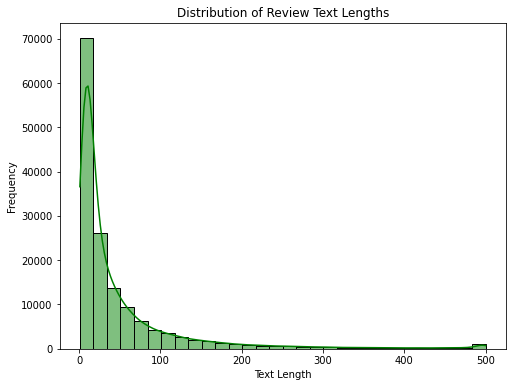

/tmp/ipykernel_11776/911381443.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='score', y='text_length', data=reviews_df, palette='Set2')


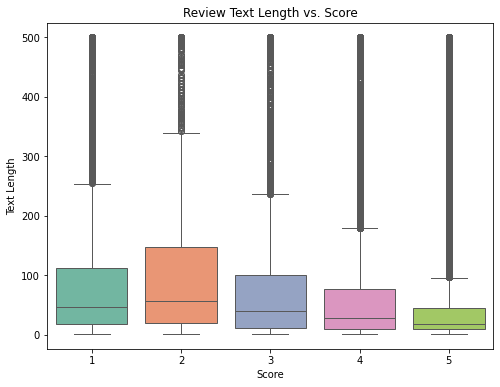

In [8]:

reviews_df['text_length'] = reviews_df['content'].apply(len)

plt.figure(figsize=(8, 6))
sns.histplot(reviews_df['text_length'], bins=30, kde=True, color='green')
plt.title('Distribution of Review Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='score', y='text_length', data=reviews_df, palette='Set2')
plt.title('Review Text Length vs. Score')
plt.xlabel('Score')
plt.ylabel('Text Length')
plt.show()



## Additional Insights



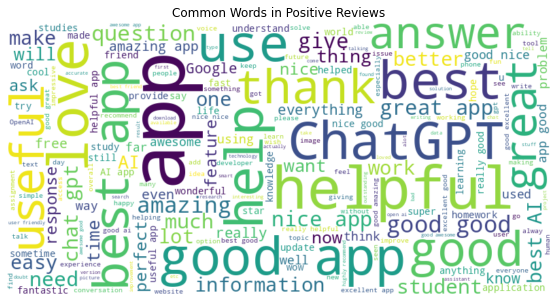

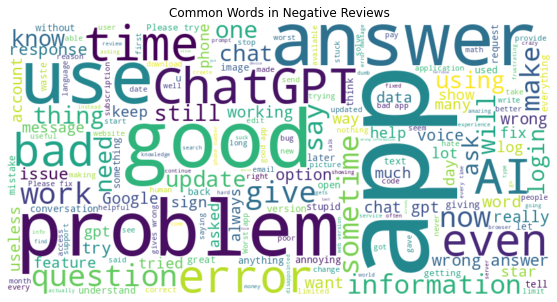

In [10]:

from wordcloud import WordCloud

def generate_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

positive_reviews = ' '.join(reviews_df[reviews_df['sentiment'] == 'positive']['content'])
generate_word_cloud(positive_reviews, 'Common Words in Positive Reviews')

negative_reviews = ' '.join(reviews_df[reviews_df['sentiment'] == 'negative']['content'])
generate_word_cloud(negative_reviews, 'Common Words in Negative Reviews')


## Insights
1. **Sentiment Analysis**:
   - The majority of the reviews are positive, indicating that most users have a favorable opinion of the ChatGPT app.
   - The sentiment analysis shows a clear distinction between positive and negative reviews based on the compound score.

2. **Temporal Trends**:
   - There is a noticeable trend in the number of reviews over time. Peaks in the number of reviews could correlate with app updates or major events related to ChatGPT.
   - Analyzing the trends can help identify periods of increased user engagement and feedback.

3. **Score Distribution**:
   - The score distribution reveals that most users rate the app highly, with a significant number of 5-star reviews.
   - There are also some low scores, which can provide insights into areas where the app may need improvement.

4. **Thumbs Up Analysis**:
   - Reviews with higher thumbs up counts are considered more helpful by other users.
   - Analyzing these reviews can provide valuable insights into common positive and negative feedback.

5. **Text Length Analysis**:
   - The length of the review text varies significantly, with some users providing detailed feedback while others leave short comments.
   - There is a relationship between text length and score, with more detailed reviews often correlating with higher or lower scores.

6. **Common Words in Reviews**:
   - The word clouds for positive and negative reviews highlight the most frequently mentioned words, providing insights into common themes and issues raised by users.

## Conclusion
The analysis of the ChatGPT user reviews dataset provides valuable insights into user sentiments, trends, and feedback. Most users have a positive experience with the app, as reflected in the high number of positive reviews and high scores. However, there are areas for improvement, as indicated by the negative reviews and lower scores.

By continuously monitoring user feedback and analyzing trends, the developers of the ChatGPT app can identify areas for improvement and enhance the overall user experience. The insights gained from this analysis can guide future updates and feature enhancements to better meet user needs and expectations.